In [1]:
import numpy as np
import matplotlib.pyplot as plt

from DatasetClass import DatasetPt
from ModelClass import RegressionModel
from src.helpers import pick_only_target, extract_data

erik_data = "/scratch/ucjf-atlas/htautau/SM_Htautau_R22/V02_skim_mva_01/*/*/*/*/*H125*.root"
dataset = DatasetPt(file_path=erik_data)
dataset.load_data()

model = RegressionModel(dataset=dataset)
model.prepare_dataset()
model.load()

higgs_pt = []

for features,target in dataset.val_dataset:
    # print("Features shape:", features[11])
    higgs_pt.append(features[11].numpy())
    # print("Target shape:", target)

pred = model.model.predict(dataset.val_dataset.batch(100000)).flatten()

2025-07-14 21:06:30.331176: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752519990.344079 3086134 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752519990.348079 3086134 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-14 21:06:30.362619: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Available GPUs: []
Batching datasets...


2025-07-14 21:06:33.782721: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model loaded from /home/kvake/HiggsAnalysisBc/models/PtNet_mmc.keras


2025-07-14 21:11:11.153031: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
I0000 00:00:1752520272.559426 3086464 service.cc:148] XLA service 0x7f207c00e8c0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752520272.559476 3086464 service.cc:156]   StreamExecutor device (0): Host, Default Version
2025-07-14 21:11:12.570570: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1752520272.756108 3086464 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from DatasetClass import DatasetPt
from ModelClass import RegressionModel
from src.helpers import pick_only_target, extract_data

erik_data = "/scratch/ucjf-atlas/htautau/SM_Htautau_R22/V02_skim_mva_01/*/*/*/*/*H125*.root"
dataset = DatasetPt(file_paths=erik_data)
dataset.load_data()

feature_index = dataset.variables_higgs.index("ditau_higgspt")
print("Feature index:", feature_index)
higgs_pt = []

for features,target in dataset.val_dataset.take(5):
    print("Features:", features)
    print("Feature ditau_higgspt:", features[feature_index])

Feature index: 5
Features: tf.Tensor(
[ 1.37355896e+02  4.58340943e-01 -2.31630638e-01 -3.30362468e-06
  4.33227425e+01  8.81887615e-01 -1.70803463e+00  1.05658375e-01
  4.23546672e-01  1.47640395e+00  1.53595591e+00  1.70754166e+02
  1.80678635e+02  1.39059006e+02 -4.70488846e-01  2.51743889e+00
  1.10919428e+01  3.38925743e+01  4.15418959e+00 -2.50977087e+00
  1.52587891e-05  1.52986526e+02  2.58751225e+00  2.72968006e+00
  6.91880981e+02  2.29326038e+01  0.00000000e+00 -4.58519518e-01
 -5.32382447e-03  2.00000000e+00  2.00000000e+00  1.00000000e+00
  0.00000000e+00  1.00000000e+00  1.00000000e+00  1.47301682e+02], shape=(36,), dtype=float32)
Feature ditau_higgspt: tf.Tensor(0.8818876, shape=(), dtype=float32)
Features: tf.Tensor(
[ 1.7031258e+02 -1.7811326e+00  1.4642797e+00  7.6293945e-06
  8.8968422e+01 -2.2914264e+00  2.1359832e+00  5.3947965e-06
  5.1029384e-01  6.7170358e-01  8.4355527e-01  2.8681549e+02
  2.5928101e+02  2.1384258e+02 -2.6290815e+00 -1.5833583e+00
  2.1762077e+

2025-07-10 02:57:14.765235: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [2]:
print("Predictions shape:", pred.shape)
print("Higgs pt shape:", np.array(higgs_pt).shape)

Predictions shape: (815463,)
Higgs pt shape: (815463,)


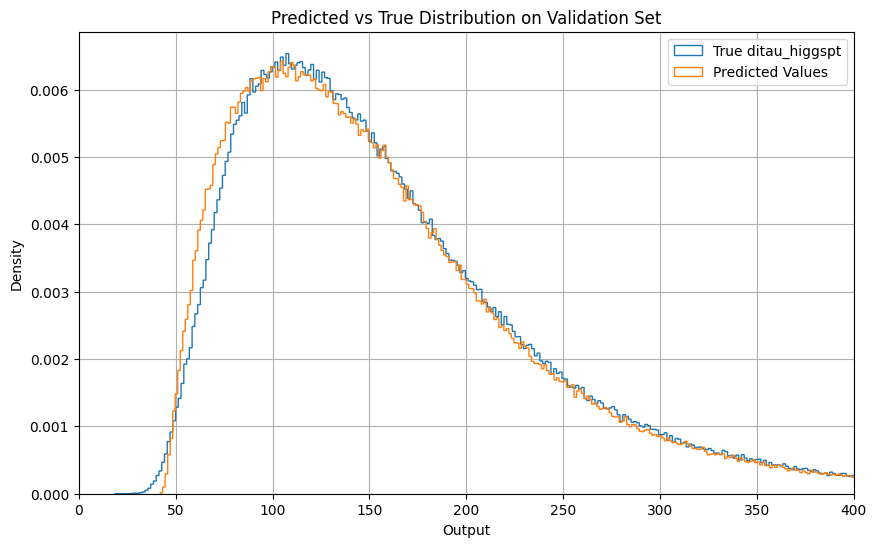

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(np.array(higgs_pt), bins=1000, histtype='step', label='True ditau_higgspt', density=True)
plt.hist(np.array(pred), bins=1000, histtype='step', label='Predicted Values', density=True)
plt.xlabel("Output")
plt.ylabel("Density")
plt.title("Predicted vs True Distribution on Validation Set")
plt.xlim(0, 400)
# plt.ylim(0, 0.05)
plt.legend()
plt.grid(True)
# plt.savefig("predicted_vs_true_distribution.png", dpi=300)

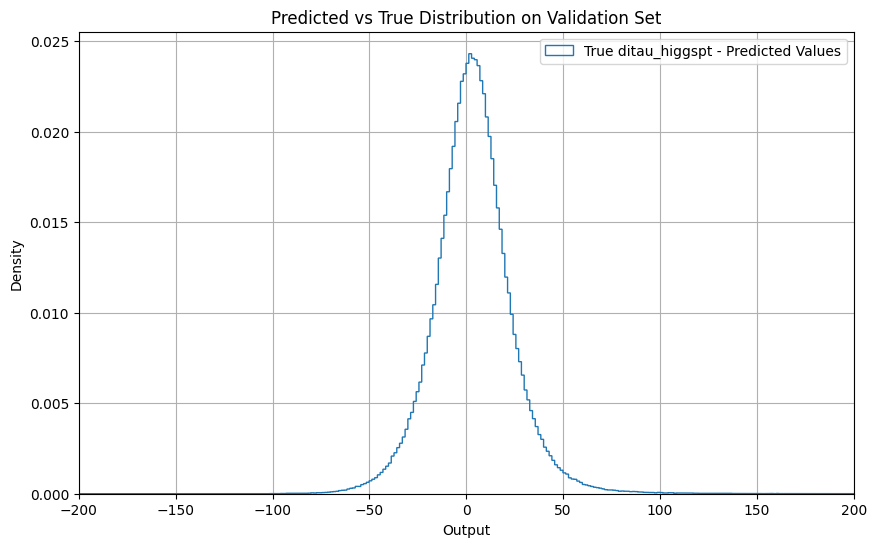

In [4]:
plt.figure(figsize=(10, 6))
plt.hist(np.array(higgs_pt)-np.array(pred), bins=1000, histtype='step', label='True ditau_higgspt - Predicted Values', density=True)
plt.xlabel("Output")
plt.ylabel("Density")
plt.title("Predicted vs True Distribution on Validation Set")
plt.xlim(-200, 200)
# plt.ylim(0, 0.05)
plt.legend()
plt.grid(True)
# plt.savefig("predicted_vs_true_distribution.png", dpi=300)

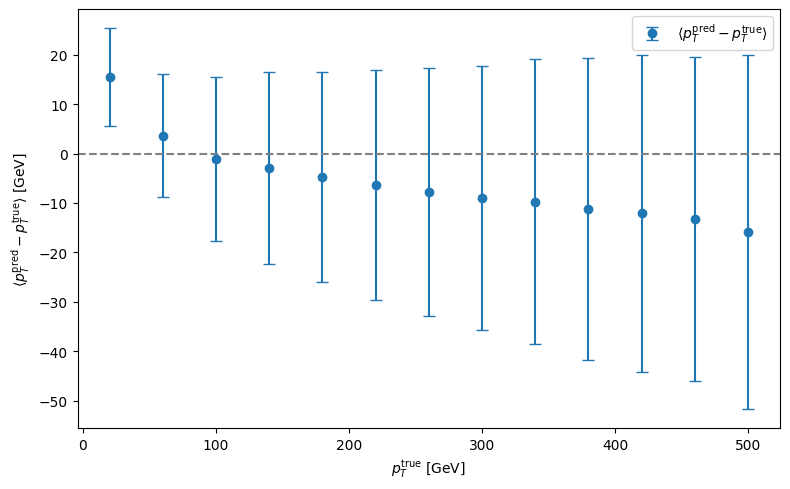

In [2]:
higgs_pt = np.array(higgs_pt)
pred = np.array(pred)

# Biny
bins = np.arange(0, 560, 40)
bin_centers = (bins[:-1] + bins[1:]) / 2

mean_diff = []
std_diff = []

for i in range(len(bins) - 1):
    mask = (higgs_pt >= bins[i]) & (higgs_pt < bins[i + 1])
    if np.any(mask):
        diff = pred[mask] - higgs_pt[mask]
        mean_diff.append(np.mean(diff))
        std_diff.append(np.std(diff))
    else:
        mean_diff.append(np.nan)
        std_diff.append(np.nan)

# Plot
plt.figure(figsize=(8,5))
plt.errorbar(bin_centers, mean_diff, yerr=std_diff, fmt='o', capsize=4,
             label=r'$\langle p_T^{\mathrm{pred}} - p_T^{\mathrm{true}} \rangle$')
plt.xlabel(r'$p_T^{\mathrm{true}}$ [GeV]')
plt.ylabel(r'$\langle p_T^{\mathrm{pred}} - p_T^{\mathrm{true}} \rangle$ [GeV]')
# plt.title('Prediction Bias vs True Higgs $p_T$')
plt.axhline(0, color='gray', linestyle='--')
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.savefig("mean_residual_plot")
plt.show()


In [24]:
import numpy as np
import matplotlib.pyplot as plt

from DatasetClass import DatasetPt
from ModelClass import RegressionModel
from src.helpers import pick_only_target, extract_data

erik_data = "/scratch/ucjf-atlas/htautau/SM_Htautau_R22/V02_skim_mva_01/*/*/*/*/*H125*.root"
dataset = DatasetPt(file_paths=erik_data)
dataset.load_data()

model = RegressionModel(dataset=dataset)
model.prepare_dataset()
model.load()


for features,target in dataset.train_dataset.take(1):
    print("Features shape:", features.shape)
    print("Target shape:", target.shape)



# feature_index = dataset.variables_higgs.index("ditau_higgspt")

# inputs = []

# for x,_ in dataset.val_dataset:
#     input_vec = x[feature_index].numpy()  # len jedna feature sa ponechá
#     inputs.append(input_vec)

# inputs = np.array(inputs)
# print(inputs.shape)


# y_true = np.array(extract_data(inputs)).flatten()
# y_pred = model.model.predict(dataset.val_dataset.batch(100000)).flatten()



# plt.figure(figsize=(10, 6))
# plt.hist(y_true-y_true, bins=1000, histtype='step', label='True Values minus Pred Values', density=True)
# # plt.hist(y_pred, bins=100, histtype='step', label='Predicted Values', density=True)
# plt.xlabel("Output")
# plt.ylabel("Density")
# plt.title("Predicted vs True Distribution on Validation Set")
# # plt.xlim(-70, 70)
# plt.legend()
# plt.grid(True)
# # plt.savefig("predicted_vs_true_distribution.png", dpi=300)

Batching datasets...
Model loaded from /home/kvake/HiggsAnalysisBc/models/PtNet_mmc.keras
Features shape: (36,)
Target shape: ()


2025-07-09 16:18:31.869011: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [25]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


# 1. Calculate residuals for both models
residuals_nn = y_pred_H125 - y_true_H125
residuals_mmc = y_mmc_H125 - y_true_H125

# 2. Define the bins based on the true mass
n_intervals = 20
true_mass_bins = np.linspace(20.0, 200.0, n_intervals + 1)
print(f"True mass bins: {true_mass_bins}")
# 3. Calculate binned statistics for the NN model
mean_residuals_nn, _, _ = stats.binned_statistic(
    y_true_H125, residuals_nn, statistic='mean', bins=true_mass_bins
)
std_residuals_nn, _, _ = stats.binned_statistic(
    y_true_H125, residuals_nn, statistic='std', bins=true_mass_bins
)

# 4. Calculate binned statistics for the MMC model
mean_residuals_mmc, _, _ = stats.binned_statistic(
    y_true_H125, residuals_mmc, statistic='mean', bins=true_mass_bins
)
std_residuals_mmc, _, _ = stats.binned_statistic(
    y_true_H125, residuals_mmc, statistic='std', bins=true_mass_bins
)

# 5. Count the number of samples per bin (same for both models)
count_per_bin, _, _ = stats.binned_statistic(
    y_true_H125, y_true_H125, statistic='count', bins=true_mass_bins
)

# 6. Calculate the Standard Error of the Mean (SEM) for both models
# Ensure we don't divide by zero for bins with no data
count_per_bin_float = count_per_bin.astype(float)
# Replace zero counts with NaN to avoid division errors and propagate NaN
count_per_bin_float[count_per_bin_float == 0] = np.nan

sem_nn = std_residuals_nn / np.sqrt(count_per_bin_float)
sem_mmc = std_residuals_mmc / np.sqrt(count_per_bin_float)

# 7. Prepare data for plotting
bin_centers = (true_mass_bins[:-1] + true_mass_bins[1:]) / 2


plt.figure(figsize=(10, 7))
plt.axhline(0, color='black', linestyle='--', linewidth=0.5, label='Ideal')

plt.errorbar(
    bin_centers,
    mean_residuals_nn,
    yerr=sem_nn,
    fmt='o',  # Format: 'o' for circles
    capsize=5,
    markersize=5,
    color='crimson',
    label='NN (Augmented)',
    alpha=0.8,
    capthick=1,
    elinewidth=1
)


plt.xlabel(r'Mass [GeV]', fontsize=16, horizontalalignment='right', x=1)
plt.ylabel(r'Mean Residual [GeV]', fontsize=16, horizontalalignment='right', y=1)
plt.tick_params(axis='both', which='major', labelsize=14, direction='in', length=6, width=1)
plt.legend(fontsize=12)
plt.savefig('out/mean_residual_plot.png', dpi=300)
plt.tight_layout()
plt.grid(False)
plt.show()

NameError: name 'y_pred_H125' is not defined